# **Importing Libraries**

In [46]:
!pip install tensorflow

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Input
from scipy.stats import chi2_contingency
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Preprocessing and EDA**

In [48]:
df = pd.read_csv('/content/healthcare_dataset.csv')

In [49]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [50]:
df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

(None,
                Name           Age Gender Blood Type Medical Condition  \
 count         55500  55500.000000  55500      55500             55500   
 unique        49992           NaN      2          8                 6   
 top     DAvId muNoZ           NaN   Male         A-         Arthritis   
 freq              3           NaN  27774       6969              9308   
 mean            NaN     51.539459    NaN        NaN               NaN   
 std             NaN     19.602454    NaN        NaN               NaN   
 min             NaN     13.000000    NaN        NaN               NaN   
 25%             NaN     35.000000    NaN        NaN               NaN   
 50%             NaN     52.000000    NaN        NaN               NaN   
 75%             NaN     68.000000    NaN        NaN               NaN   
 max             NaN     89.000000    NaN        NaN               NaN   
 
        Date of Admission         Doctor   Hospital Insurance Provider  \
 count              55500    

In [51]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


***Notes***


**Numerical columns :**


Age: Ranges from 13 to 89.

Billing Amount: Includes some unusual negative values.

Room Number: Numeric values between 101 and 500.


**Categorical Columns:**

Columns like Gender, Blood Type, Medical Condition, Admission Type, and Test Results have distinct categories.
Name, Doctor, Hospital, Insurance Provider, Medication, and Date columns might need processing for consistency and analysis.


**Dates:**

Date of Admission and Discharge Date are stored as strings and need conversion to datetime format.



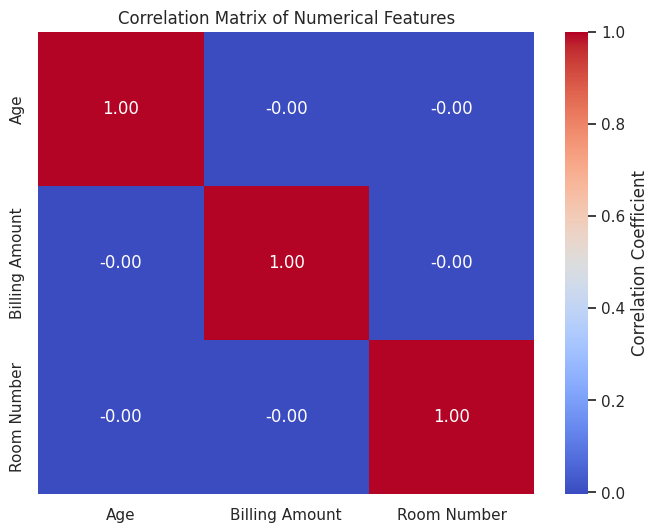

In [52]:
numerical_data = df[['Age', 'Billing Amount', 'Room Number']]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [53]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
cramers_v_results = {col: cramers_v(df[col], df['Test Results']) for col in categorical_columns}

cramers_v_results

{'Gender': 0.0005744600387016234,
 'Blood Type': 0.0,
 'Medical Condition': 0.005415204416213561,
 'Doctor': 0.2963792749670594,
 'Hospital': 0.2864839966053823,
 'Insurance Provider': 0.0018439669742683898,
 'Admission Type': 0.0,
 'Medication': 0.0}

Class Counts:
 Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

Class Percentages:
 Test Results
Abnormal        33.562162
Normal          33.363964
Inconclusive    33.073874
Name: proportion, dtype: float64


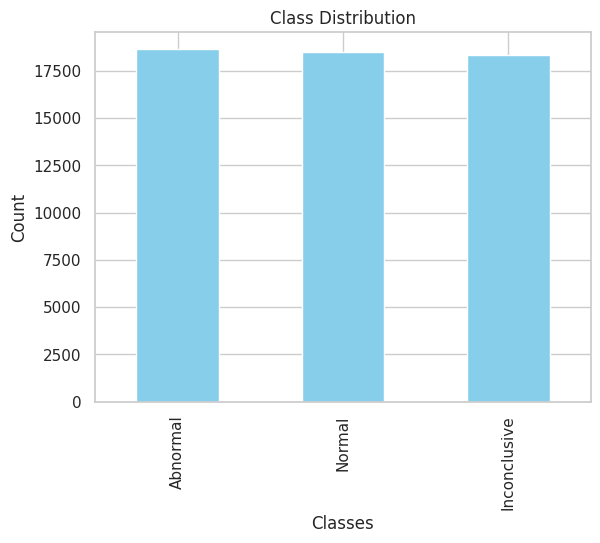

In [54]:
target = df['Test Results']

class_counts = target.value_counts()

print("Class Counts:\n", class_counts)

class_percentages = target.value_counts(normalize=True) * 100
print("\nClass Percentages:\n", class_percentages)

class_counts.plot(kind='bar', color='skyblue', title='Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

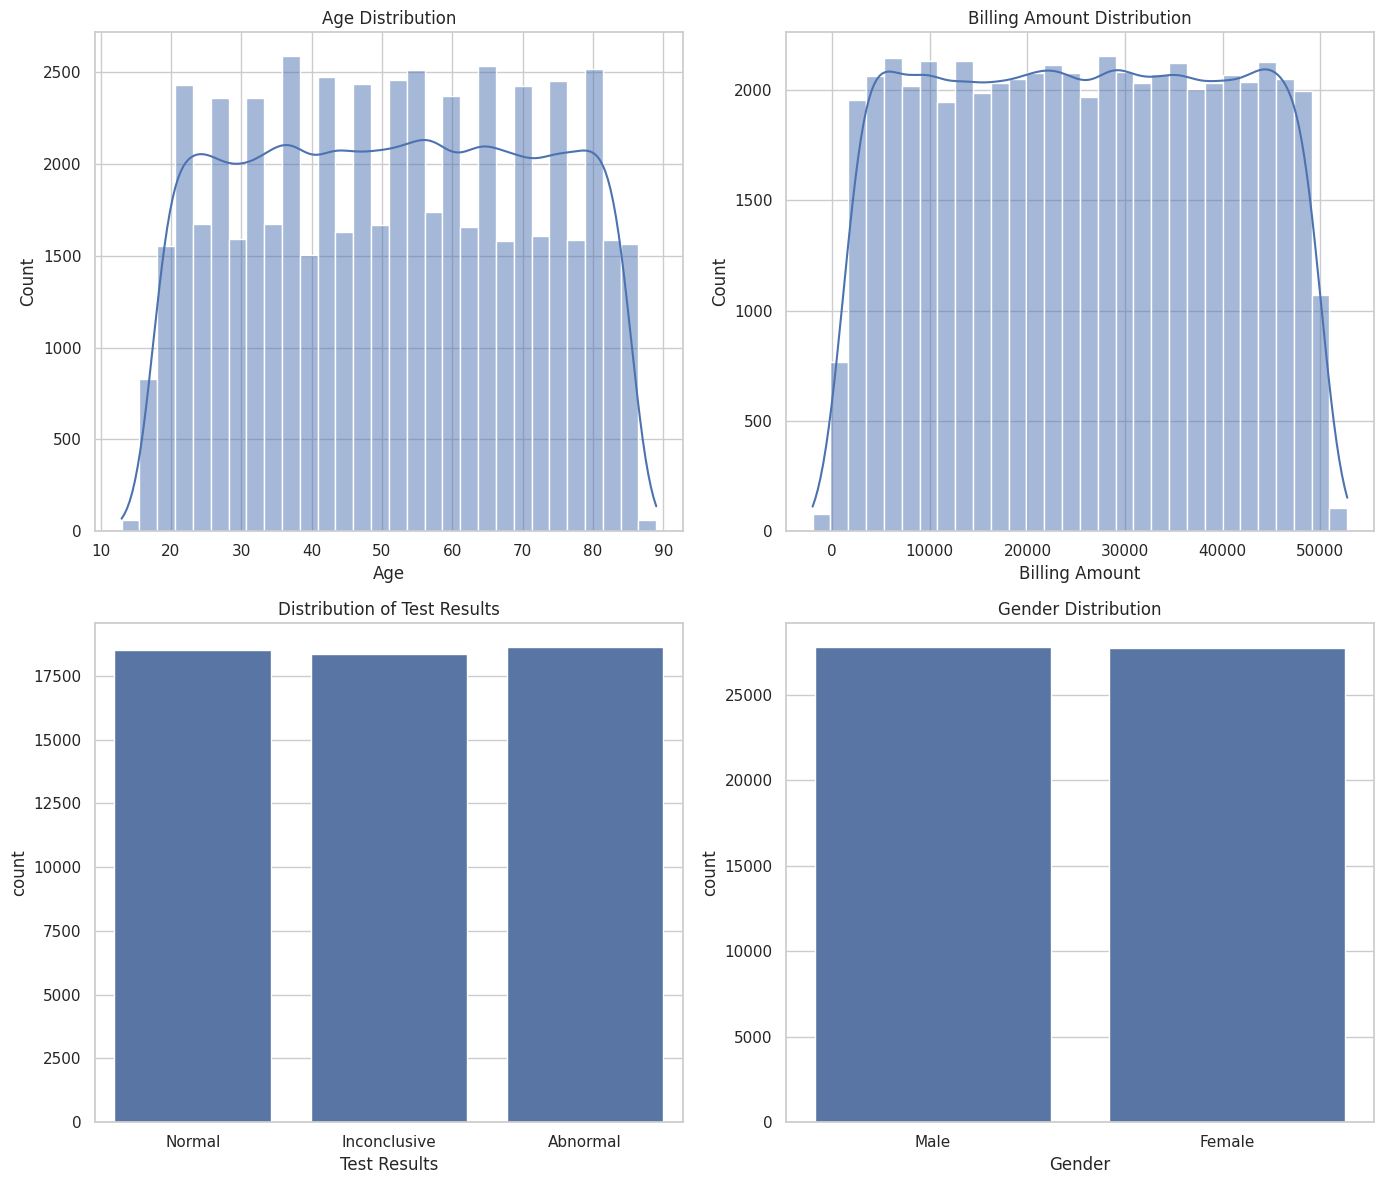

In [55]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Billing Amount'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Billing Amount Distribution')

sns.countplot(x='Test Results', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Test Results')

sns.countplot(x='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

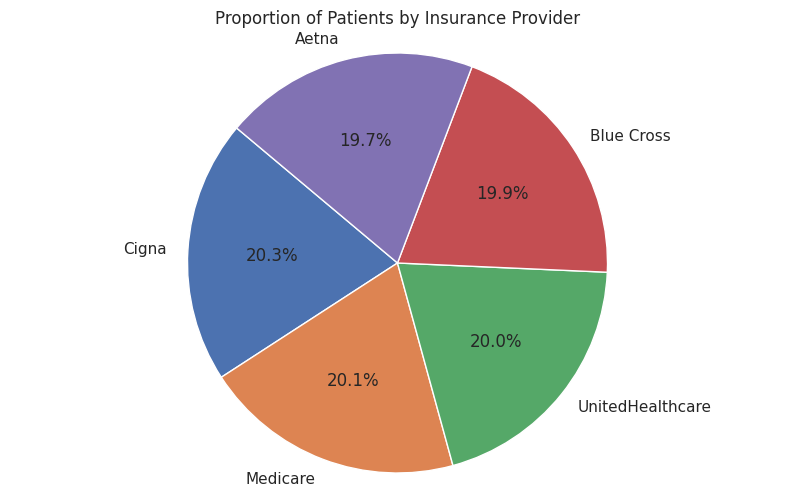

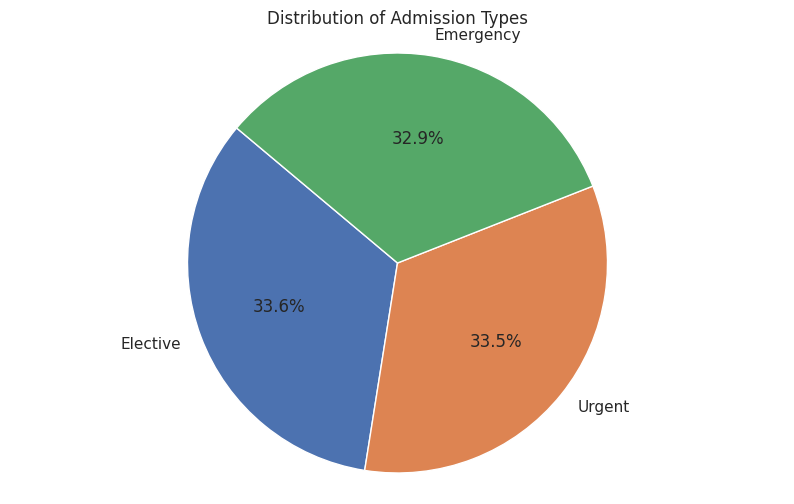

In [56]:
insurance_counts = df['Insurance Provider'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients by Insurance Provider')
plt.axis('equal')
plt.show()


admission_counts = df['Admission Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Admission Types')
plt.axis('equal')
plt.show()

<ipython-input-57-642d23bc2a2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


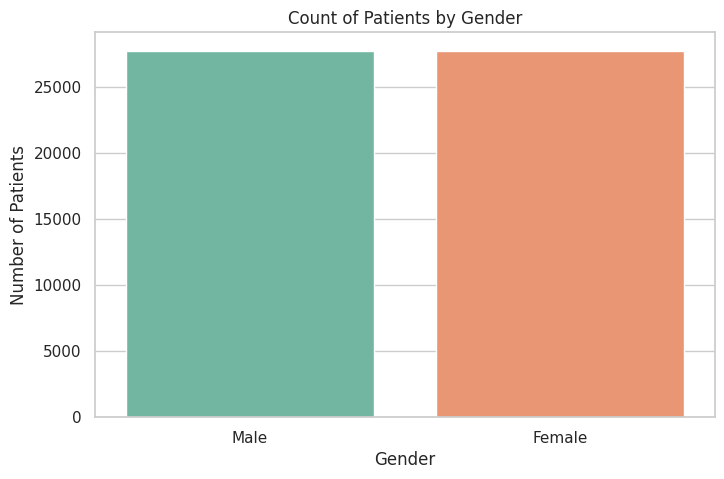

<ipython-input-57-642d23bc2a2f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Type', data=df, palette='Set3', order=df['Blood Type'].value_counts().index)


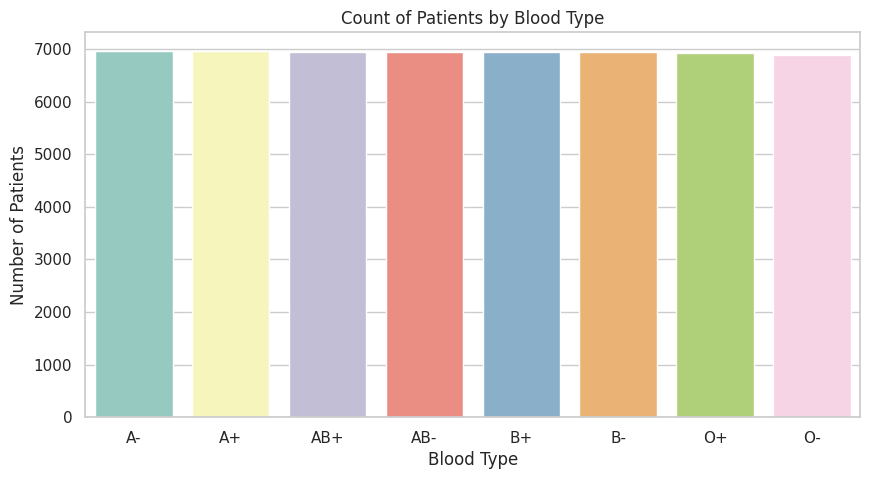

<ipython-input-57-642d23bc2a2f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Medical Condition', data=df, palette='Set1', order=df['Medical Condition'].value_counts().index)


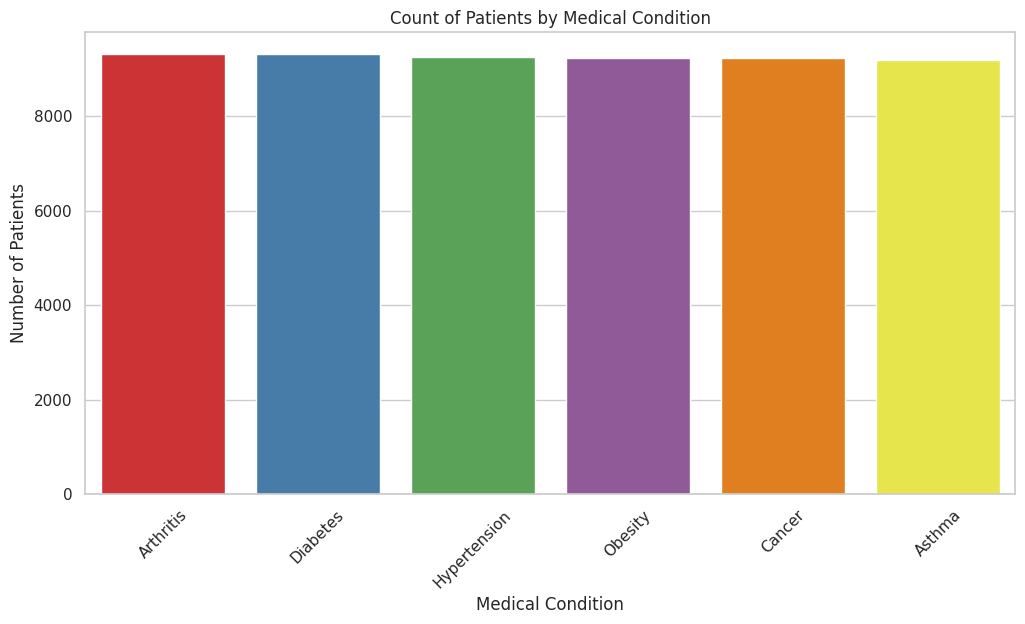

In [57]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Count of Patients by Gender')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Blood Type', data=df, palette='Set3', order=df['Blood Type'].value_counts().index)
plt.title('Count of Patients by Blood Type')
plt.ylabel('Number of Patients')
plt.xlabel('Blood Type')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', data=df, palette='Set1', order=df['Medical Condition'].value_counts().index)
plt.title('Count of Patients by Medical Condition')
plt.ylabel('Number of Patients')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()


In [58]:
df = df.drop(['Name', 'Doctor', 'Room Number'], axis=1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [59]:
df['Admission_Day'] = pd.to_datetime(df['Date of Admission']).dt.day
df['Admission_Month'] = pd.to_datetime(df['Date of Admission']).dt.month
df['Admission_Year'] = pd.to_datetime(df['Date of Admission']).dt.year

df['Discharge_Day'] = pd.to_datetime(df['Discharge Date']).dt.day
df['Discharge_Month'] = pd.to_datetime(df['Discharge Date']).dt.month
df['Discharge_Year'] = pd.to_datetime(df['Discharge Date']).dt.year

df = df.drop(['Date of Admission', 'Discharge Date'], axis=1)

df.head()


,Age,Gender,Blood Type,Medical Condition,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Admission_Day,Admission_Month,Admission_Year,Discharge_Day,Discharge_Month,Discharge_Year
0,30,Male,B-,Cancer,Sons and Miller,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,31,1,2024,2,2,2024
1,62,Male,A+,Obesity,Kim Inc,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,20,8,2019,26,8,2019
2,76,Female,A-,Obesity,Cook PLC,Aetna,27955.096079,Emergency,Aspirin,Normal,22,9,2022,7,10,2022
3,28,Female,O+,Diabetes,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,Ibuprofen,Abnormal,18,11,2020,18,12,2020
4,43,Female,AB+,Cancer,White-White,Aetna,14238.317814,Urgent,Penicillin,Abnormal,19,9,2022,9,10,2022


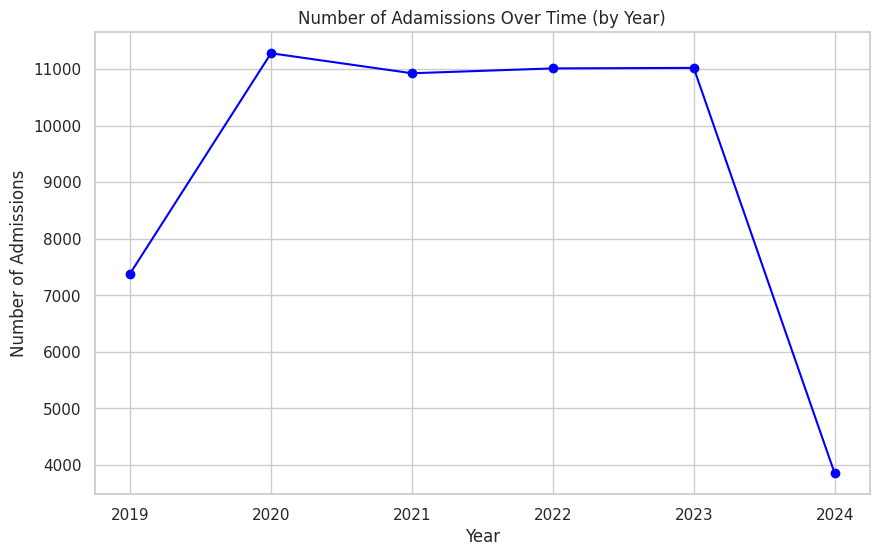

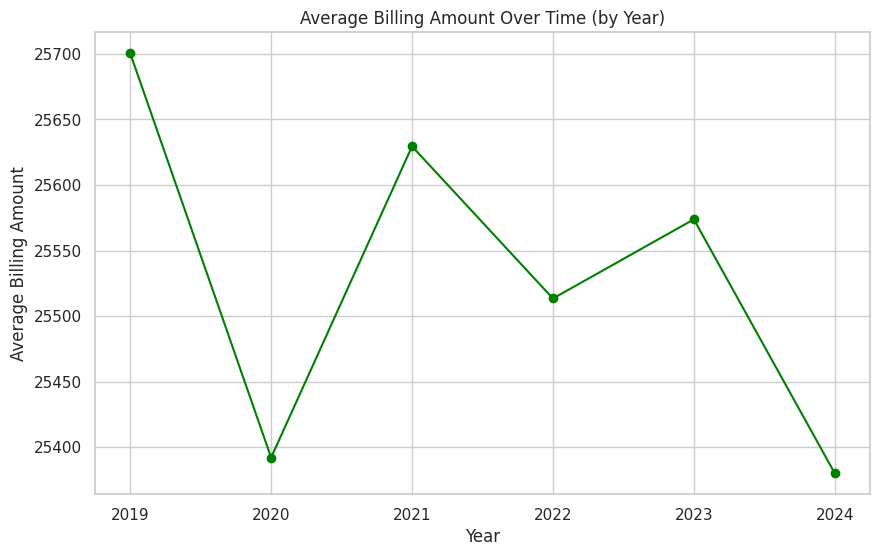

In [60]:
admissions_per_year = df['Admission_Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
admissions_per_year.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Number of Adamissions Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.xticks(admissions_per_year.index)
plt.show()

average_billing_per_year = df.groupby('Admission_Year')['Billing Amount'].mean()

plt.figure(figsize=(10, 6))
average_billing_per_year.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Average Billing Amount Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Average Billing Amount')
plt.grid(True)
plt.xticks(average_billing_per_year.index)
plt.show()

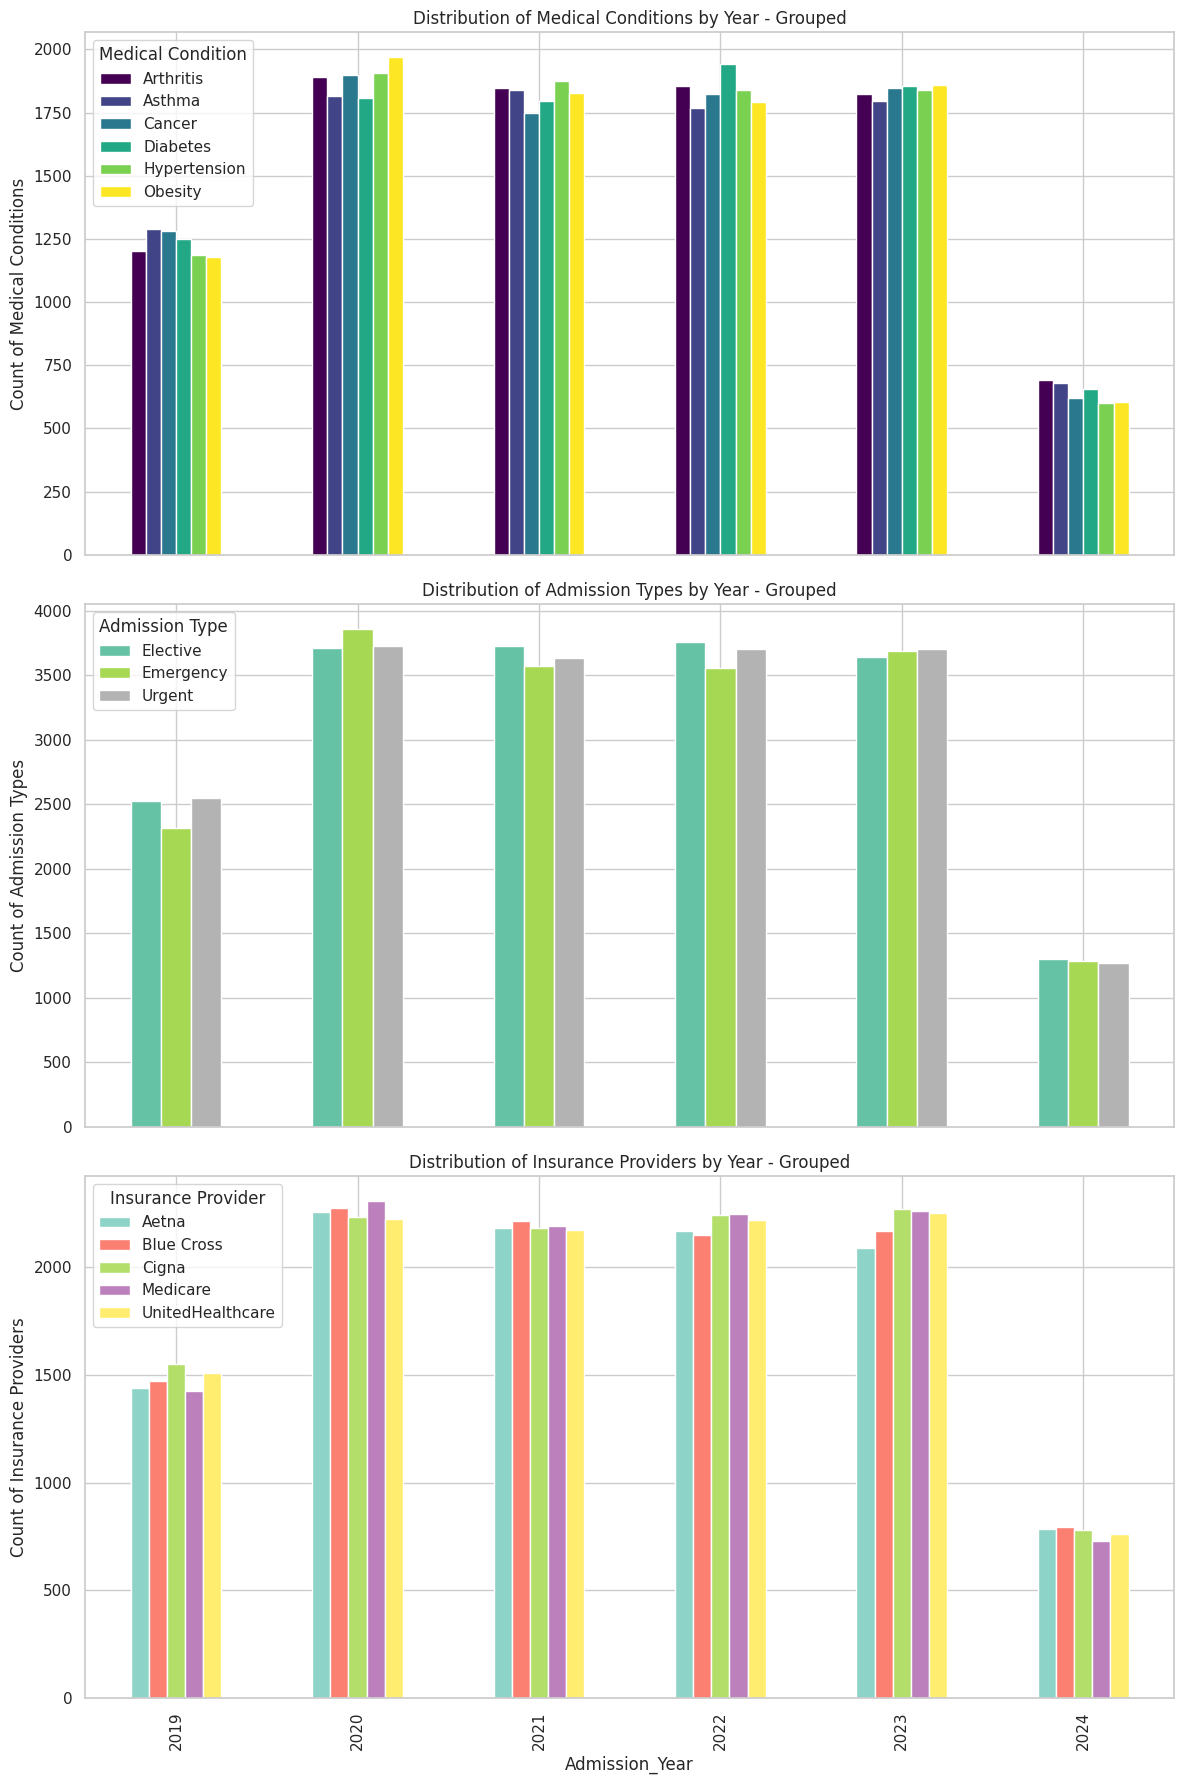

In [61]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

medical_conditions_per_year = pd.crosstab(df['Admission_Year'], df['Medical Condition'])
medical_conditions_per_year.plot(kind='bar', ax=ax[0], colormap='viridis')
ax[0].set_title('Distribution of Medical Conditions by Year - Grouped')
ax[0].set_ylabel('Count of Medical Conditions')
ax[0].legend(title='Medical Condition', loc='upper left')

admission_types_per_year = pd.crosstab(df['Admission_Year'], df['Admission Type'])
admission_types_per_year.plot(kind='bar', ax=ax[1], colormap='Set2')
ax[1].set_title('Distribution of Admission Types by Year - Grouped')
ax[1].set_ylabel('Count of Admission Types')
ax[1].legend(title='Admission Type', loc='upper left')

insurance_providers_per_year = pd.crosstab(df['Admission_Year'], df['Insurance Provider'])
insurance_providers_per_year.plot(kind='bar', ax=ax[2], colormap='Set3')
ax[2].set_title('Distribution of Insurance Providers by Year - Grouped')
ax[2].set_ylabel('Count of Insurance Providers')
ax[2].legend(title='Insurance Provider', loc='upper left')


plt.tight_layout()
plt.show()

# **Feature Selection**

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Test Results'])
y = df['Test Results']

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

top_5_features = mi_scores_series.head(5).index.tolist()


print("Top 5 Selected Features:", top_5_features)

Top 5 Selected Features: ['Billing Amount', 'Hospital', 'Admission Type', 'Gender', 'Admission_Month']


In [63]:
from sklearn.feature_selection import SelectKBest, f_classif


categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Test Results'])
y = df['Test Results']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


print("Top 5 Selected Features:", selected_features.tolist())

Top 5 Selected Features: ['Age', 'Gender', 'Hospital', 'Insurance Provider', 'Discharge_Day']


# **Model to predict the Test result**

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_selected = X[top_5_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


rf_params = {
    'n_estimators': [150, 400, 200],
    'max_depth': [10, 20, 80],
    'min_samples_split': [20, 10, 14]
}

dt_params = {
    'max_depth': [30, 80, 90],
    'min_samples_split': [60, 35, 70]
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (60,), (100, 70)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01]
}


rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42, max_iter=1500)

rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy')
dt_grid = GridSearchCV(dt_model, dt_params, cv=3, scoring='accuracy')
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=3, scoring='accuracy')

rf_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
mlp_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
dt_best = dt_grid.best_estimator_
mlp_best = mlp_grid.best_estimator_

rf_pred = rf_best.predict(X_test)
dt_pred = dt_best.predict(X_test)
mlp_pred = mlp_best.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

results = [
    evaluate_model(y_test, rf_pred, "Random Forest"),
    evaluate_model(y_test, dt_pred, "Decision Tree"),
    evaluate_model(y_test, mlp_pred, "MLP Neural Network")
]

for result in results:
    print(result)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best parameters for MLP:", mlp_grid.best_params_)

{'Model': 'Random Forest', 'Accuracy': 0.42567567567567566, 'Precision': 0.42567442748423134, 'Recall': 0.42567567567567566, 'F1 Score': 0.4256708991724236}
{'Model': 'Decision Tree', 'Accuracy': 0.3699099099099099, 'Precision': 0.3698306627732505, 'Recall': 0.3699099099099099, 'F1 Score': 0.3698158640274602}
{'Model': 'MLP Neural Network', 'Accuracy': 0.3381981981981982, 'Precision': 0.11437802126450775, 'Recall': 0.3381981981981982, 'F1 Score': 0.17094331978403607}
Best parameters for Random Forest: {'max_depth': 80, 'min_samples_split': 10, 'n_estimators': 400}
Best parameters for Decision Tree: {'max_depth': 90, 'min_samples_split': 35}
Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 70)}
